In [266]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM, Dense, Dropout
import tensorflow as tf

In [267]:
data=pd.read_excel('C:/Users/hatice.kocabas/Desktop/Demir Cevheri Fiyat Tahmini/data_v6.xlsx')

In [268]:
data.shape

(596, 12)

In [269]:
data.head(20)

,Date,Demir Cevheri Fiyatı,Brent Petrol Fiyatı,Dolar Alış,Dolar Satış,TÜFE (Yıllık % Değişim),TÜFE (Aylık % Değişim),Vale3_Borsa_Değerleri,BHP Group Borsa verileri,ÇİN (TÜFE) (Yıllık),Sentiment,Sentiment_Score
0,2022-06-13,140.34,122.27,17.0589,17.0896,78.62,4.95,68.43,NaN,0.021,NaN,NaN
1,2022-06-14,140.09,121.17,17.2344,17.2654,78.62,4.95,68.29,44.26,0.021,NaN,NaN
2,2022-06-15,137.17,118.51,17.2343,17.2653,78.62,4.95,68.25,43.90,0.021,NaN,NaN
3,2022-06-16,137.85,119.81,17.2568,17.2879,78.62,4.95,NaN,44.01,0.021,NaN,NaN
4,2022-06-17,135.69,113.12,17.2880,17.3191,78.62,4.95,64.69,42.52,0.021,NaN,NaN
5,2022-06-21,133.47,114.65,17.3113,17.3425,78.62,4.95,63.51,40.95,0.021,NaN,NaN
6,2022-06-22,127.92,111.74,17.3168,17.3480,78.62,4.95,62.97,41.03,0.021,NaN,NaN
7,2022-06-23,131.45,110.05,17.3301,17.3613,78.62,4.95,60.67,40.50,0.021,NaN,NaN
8,2022-06-24,129.71,113.12,17.3470,17.3782,78.62,4.95,62.36,40.02,0.021,NaN,NaN
9,2022-06-27,130.93,115.09,17.3478,17.3791,78.62,4.95,65.22,41.20,0.021,-1.0,0.999981


In [270]:
data.tail()

,Date,Demir Cevheri Fiyatı,Brent Petrol Fiyatı,Dolar Alış,Dolar Satış,TÜFE (Yıllık % Değişim),TÜFE (Aylık % Değişim),Vale3_Borsa_Değerleri,BHP Group Borsa verileri,ÇİN (TÜFE) (Yıllık),Sentiment,Sentiment_Score
591,2024-10-14,107.11,77.46,34.1625,34.2241,NaN,NaN,61.93,43.80,0.004,NaN,NaN
592,2024-10-15,106.63,74.25,34.2034,34.2650,NaN,NaN,61.17,44.01,0.004,NaN,NaN
593,2024-10-16,106.20,74.22,34.2018,34.2634,NaN,NaN,62.34,43.54,0.004,-1.0,1.0
594,2024-10-17,105.36,74.45,34.1633,34.2248,NaN,NaN,60.76,42.99,0.004,NaN,NaN
595,2024-10-18,105.37,73.06,34.1155,34.1769,NaN,NaN,60.55,42.06,0.004,NaN,NaN


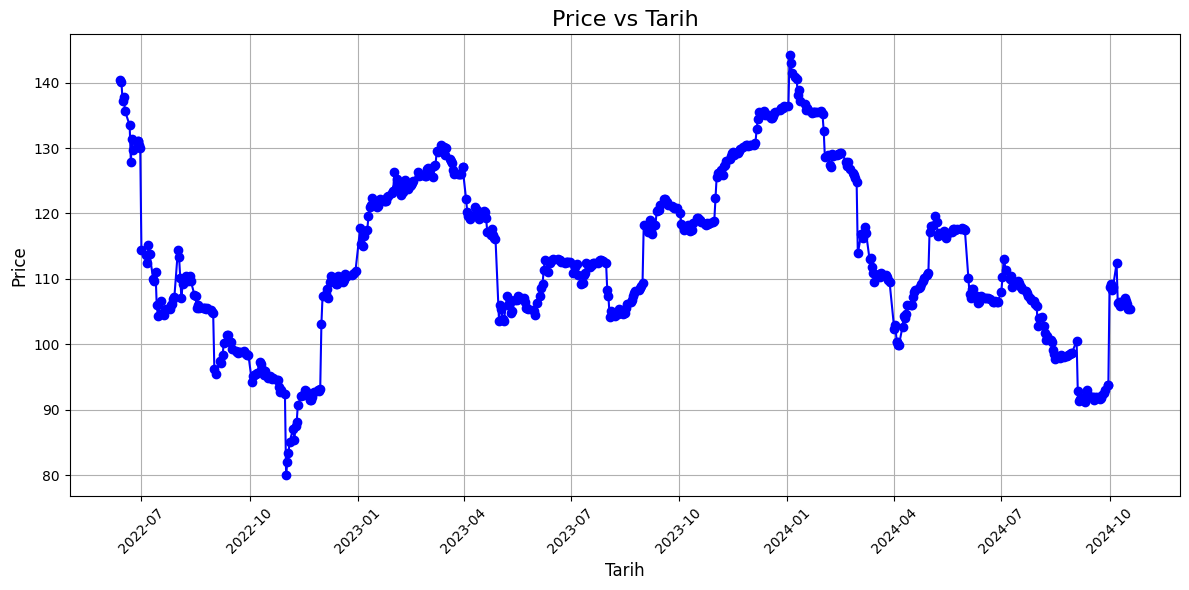

In [271]:
plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Demir Cevheri Fiyatı'], marker='o', linestyle='-', color='b')

plt.title("Price vs Tarih", fontsize=16)
plt.xlabel("Tarih", fontsize=12)
plt.ylabel("Price", fontsize=12)

plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

In [272]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

data.isnull().sum()

Demir Cevheri Fiyatı          0
Brent Petrol Fiyatı           0
Dolar Alış                   20
Dolar Satış                  20
TÜFE (Yıllık % Değişim)      14
TÜFE (Aylık % Değişim)       14
Vale3_Borsa_Değerleri        19
BHP Group Borsa verileri     11
ÇİN (TÜFE) (Yıllık)           0
Sentiment                   485
Sentiment_Score             485
dtype: int64

In [273]:
def handle_missing_data(df):
    df['Sentiment'].fillna(0.0, inplace=True)
    df['Sentiment_Score'].fillna(0.0, inplace=True)
    return df

df = handle_missing_data(data)

C:\Users\hatice.kocabas\AppData\Local\Temp\ipykernel_3244\3834613030.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sentiment'].fillna(0.0, inplace=True)
C:\Users\hatice.kocabas\AppData\Local\Temp\ipykernel_3244\3834613030.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [274]:
data['Dolar Alış '] = data['Dolar Alış '].ffill()
data['Dolar Satış'] = data['Dolar Satış'].ffill()
data['TÜFE (Yıllık % Değişim)'] = data['TÜFE (Yıllık % Değişim)'].ffill()
data['TÜFE (Aylık % Değişim)'] = data['TÜFE (Aylık % Değişim)'].ffill()
data['Vale3_Borsa_Değerleri'] = data['Vale3_Borsa_Değerleri'].ffill()
data['BHP Group Borsa verileri'] = data['BHP Group Borsa verileri'].bfill()


In [275]:
data.isnull().sum()

Demir Cevheri Fiyatı        0
Brent Petrol Fiyatı         0
Dolar Alış                  0
Dolar Satış                 0
TÜFE (Yıllık % Değişim)     0
TÜFE (Aylık % Değişim)      0
Vale3_Borsa_Değerleri       0
BHP Group Borsa verileri    0
ÇİN (TÜFE) (Yıllık)         0
Sentiment                   0
Sentiment_Score             0
dtype: int64

In [276]:
data.head()

,Demir Cevheri Fiyatı,Brent Petrol Fiyatı,Dolar Alış,Dolar Satış,TÜFE (Yıllık % Değişim),TÜFE (Aylık % Değişim),Vale3_Borsa_Değerleri,BHP Group Borsa verileri,ÇİN (TÜFE) (Yıllık),Sentiment,Sentiment_Score
Date,,,,,,,,,,,
2022-06-13,140.34,122.27,17.0589,17.0896,78.62,4.95,68.43,44.26,0.021,0.0,0.0
2022-06-14,140.09,121.17,17.2344,17.2654,78.62,4.95,68.29,44.26,0.021,0.0,0.0
2022-06-15,137.17,118.51,17.2343,17.2653,78.62,4.95,68.25,43.90,0.021,0.0,0.0
2022-06-16,137.85,119.81,17.2568,17.2879,78.62,4.95,68.25,44.01,0.021,0.0,0.0
2022-06-17,135.69,113.12,17.2880,17.3191,78.62,4.95,64.69,42.52,0.021,0.0,0.0


In [277]:
data.columns

Index(['Demir Cevheri Fiyatı', 'Brent Petrol Fiyatı', 'Dolar Alış ',
       'Dolar Satış', 'TÜFE (Yıllık % Değişim)', 'TÜFE (Aylık % Değişim)',
       'Vale3_Borsa_Değerleri', 'BHP Group Borsa verileri',
       'ÇİN (TÜFE) (Yıllık) ', 'Sentiment', 'Sentiment_Score'],
      dtype='object')

In [278]:
data.drop(columns=['ÇİN (TÜFE) (Yıllık) '])

,Demir Cevheri Fiyatı,Brent Petrol Fiyatı,Dolar Alış,Dolar Satış,TÜFE (Yıllık % Değişim),TÜFE (Aylık % Değişim),Vale3_Borsa_Değerleri,BHP Group Borsa verileri,Sentiment,Sentiment_Score
Date,,,,,,,,,,
2022-06-13,140.34,122.27,17.0589,17.0896,78.62,4.95,68.43,44.26,0.0,0.0
2022-06-14,140.09,121.17,17.2344,17.2654,78.62,4.95,68.29,44.26,0.0,0.0
2022-06-15,137.17,118.51,17.2343,17.2653,78.62,4.95,68.25,43.90,0.0,0.0
2022-06-16,137.85,119.81,17.2568,17.2879,78.62,4.95,68.25,44.01,0.0,0.0
2022-06-17,135.69,113.12,17.2880,17.3191,78.62,4.95,64.69,42.52,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2024-10-14,107.11,77.46,34.1625,34.2241,49.38,2.97,61.93,43.80,0.0,0.0
2024-10-15,106.63,74.25,34.2034,34.2650,49.38,2.97,61.17,44.01,0.0,0.0
2024-10-16,106.20,74.22,34.2018,34.2634,49.38,2.97,62.34,43.54,-1.0,1.0


In [279]:
correlation_matrix = data.corr()

target_correlation = correlation_matrix['Demir Cevheri Fiyatı']
print(target_correlation)

Demir Cevheri Fiyatı        1.000000
Brent Petrol Fiyatı        -0.030094
Dolar Alış                  0.032123
Dolar Satış                 0.032123
TÜFE (Yıllık % Değişim)    -0.168592
TÜFE (Aylık % Değişim)      0.216120
Vale3_Borsa_Değerleri       0.469840
BHP Group Borsa verileri    0.664069
ÇİN (TÜFE) (Yıllık)        -0.369830
Sentiment                   0.019977
Sentiment_Score            -0.003711
Name: Demir Cevheri Fiyatı, dtype: float64


In [280]:
target = 'Demir Cevheri Fiyatı'
features = data.drop(columns=[target])
target_data = data[[target]]

scaler = MinMaxScaler(feature_range=(0, 1))

scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target_data)

In [281]:
def create_dataset(features, target, time_step=1):
    X, y = [], []
    for i in range(len(features) - time_step - 1):
        X.append(np.hstack((features[i:(i + time_step)], target[i:(i + time_step)])))
        y.append(target[i + time_step])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_features, scaled_target, time_step)

In [282]:
split_index = int(len(X) * 0.8) 
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


In [283]:
num_features = X_train.shape[2]

In [284]:
num_features

11

In [285]:
def weighted_mse_loss(weights):
    def loss(y_true, y_pred):
        mse = tf.reduce_mean(tf.square(y_true - y_pred), axis=0)
        weighted_mse = tf.reduce_sum(weights * mse)
        return weighted_mse
    return loss

feature_weights = np.array([0.8, 0.4, 0.4, 0.4, 0.3, 0.84, 0.8, 0.5, 0.3])

In [286]:
model = Sequential()
model.add(LSTM(units=5, input_shape=(time_step, num_features)))
model.add(Dense(units=1))

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer='adam',loss=weighted_mse_loss(feature_weights))

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

lstm_model = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/100


c:\Users\hatice.kocabas\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 1.4992 - val_loss: 1.4220
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.1073 - val_loss: 1.0003
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.8409 - val_loss: 0.6535
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5933 - val_loss: 0.3962
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4294 - val_loss: 0.2289
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3096 - val_loss: 0.1403
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2240 - val_loss: 0.1106
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1873 - val_loss: 0.1132
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1493 - val_loss: 0.1240
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1518 - val_loss: 0.1305
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1601 - val_loss: 0.1283
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1404 - val_loss: 0.1204
E

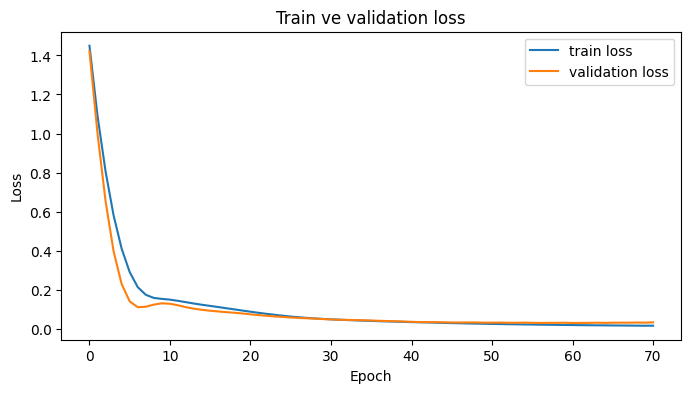

In [287]:
plt.figure(figsize=(8, 4))
plt.plot(lstm_model.history['loss'], label='train loss')
plt.plot(lstm_model.history['val_loss'], label='validation loss')
plt.title('Train ve validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [288]:
from sklearn.metrics import mean_squared_error

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))

print("Eğitim RMSE: ", train_rmse)
print("Test RMSE: ", test_rmse)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Eğitim RMSE:  0.06672997141409437
Test RMSE:  0.08981113167436972


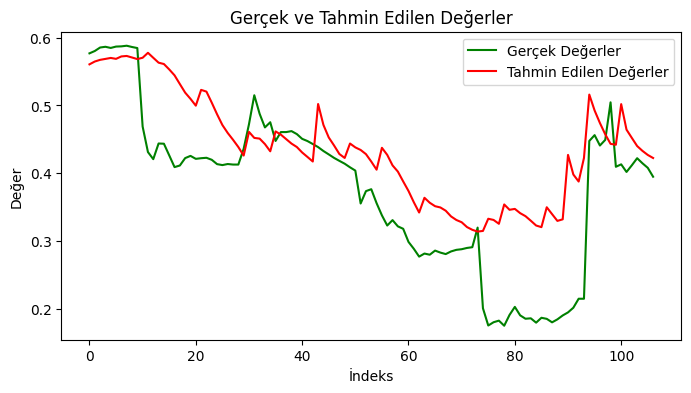

In [289]:
x = np.arange(len(y_test)) 

plt.figure(figsize=(8, 4))
plt.plot(x, y_test, label='Gerçek Değerler', color='green', marker=' ')
plt.plot(x, test_predict, label='Tahmin Edilen Değerler', color='red', marker=' ')
plt.title('Gerçek ve Tahmin Edilen Değerler')
plt.xlabel('İndeks')
plt.ylabel('Değer')
plt.legend()
plt.show()